# Mini Project on HR Data Attrition Analysis

## Dataset: HR-Employee-Attrition.csv

### Source: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [48]:
sc

<SparkContext master=local[*] appName=PySparkShell>

# HR Employee Attrition

The dataset contains records of 1,470 employees across 35 variables, capturing demographic, job-related, and compensation details along with attrition status. The absence of missing values ensures reliability for analysis.

## 1. Company Workforce Snapshot
The dataset represents 1,470 employees.
Departments: Research & Development, Sales, and Human Resources.
Research & Development is the largest group.
Sales is the second largest.
Human Resources is the smallest.
This reflects an organization with strong emphasis on R&D and client-facing roles.

## 2. Employee Demographics
Age: Employees range between 18 and 60 years.
Average age ~37 years.
50% of employees fall between 30 and 43 years.
Gender and Marital Status: Balanced mix of male and female employees, with representation across single, married, and divorced groups.
Education Field: Six main streams including Life Sciences, Medical, Marketing, and Technical backgrounds, ensuring diverse skill sets.

## 3. Roles and Career Progression
Job Roles: 9 distinct categories, such as Laboratory Technician, Sales Executive, Research Scientist, and Manager.
Job Levels: Range from 1 (entry level) to 5 (executive level).
Experience:
Average total working experience ~11 years.
Average tenure at the company ~7 years.
Some employees are freshers, while others have as many as 40 years of experience.

## 4. Compensation and Benefits
Monthly Income:
Range: 1,009 – 19,999.
Average: ~6,500.
Senior roles and higher job levels show significantly higher pay.
Salary Hikes: Percent increases between 11% and 25%, averaging ~15%.
Stock Options: Levels range from 0 to 3, showing varying access to long-term incentives.

## 5. Work Environment and Engagement
Satisfaction Measures: Job Satisfaction, Relationship Satisfaction, Work-Life Balance, and Environment Satisfaction are all rated on 1–4 scales.
Most employees report moderate-to-high satisfaction.
Overtime: Employees working overtime are more prone to attrition, a key insight for HR planning.

## 6. Attrition Trends
Attrition Rate: About 16% of employees have left the company.
Key Risk Areas:
Sales and overtime-heavy roles show higher attrition.
Younger employees and those with fewer years at the company are more likely to leave.
Attrition is linked with workload, compensation growth, and role type.

## 7. Training and Development
Training Frequency: Employees underwent between 0–6 training programs in the last year.
Average: ~3 training sessions per employee.
Training appears balanced but may vary depending on department and role.
Continuous development opportunities can play a role in improving retention and satisfaction.

## 8. Managerial and Promotion Insights
YearsWithCurrManager: Average ~4 years, with a range of 0–17.
Promotions:
Measured by YearsSinceLastPromotion, averaging ~2 years.
Many employees had recent promotions, but some have waited longer, which could influence morale.
Managerial stability and timely promotions may be critical to employee engagement and retention.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [12]:
# 2. Basic Insights
# ------------------------------
print("Total employees:", len(df))
print("Total departments:", df['Department'].nunique())
print("Department names:", df['Department'].unique())

Total employees: 1470
Total departments: 3
Department names: ['Sales' 'Research & Development' 'Human Resources']


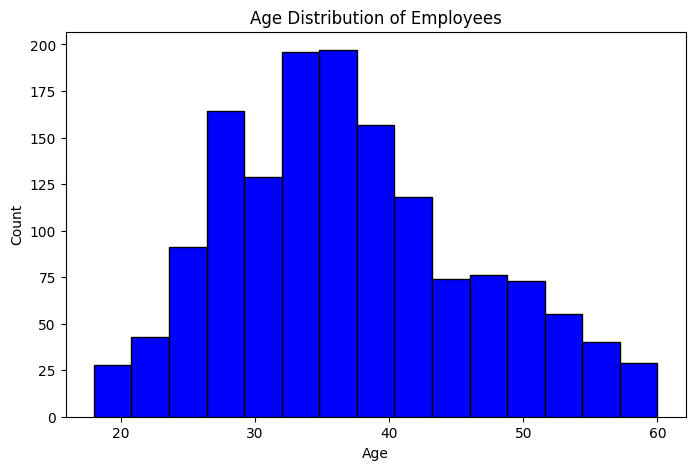

In [13]:
# 3. Age Distribution
# ------------------------------
plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=15, color="blue", edgecolor="black")
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

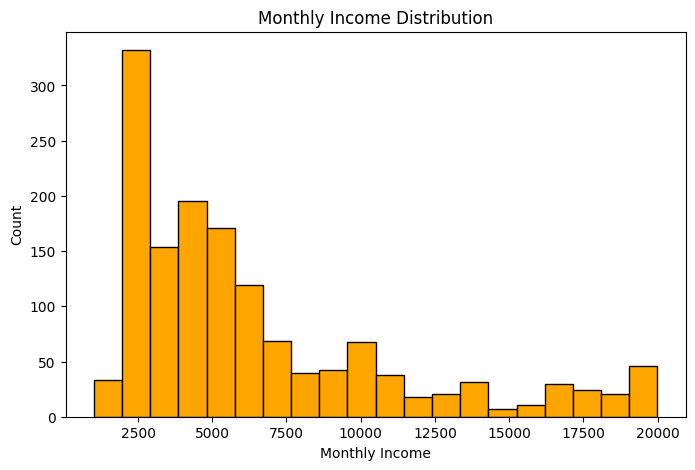

In [14]:
# 4. Monthly Income Distribution
# ------------------------------
plt.figure(figsize=(8,5))
plt.hist(df['MonthlyIncome'], bins=20, color="orange", edgecolor="black")
plt.title("Monthly Income Distribution")
plt.xlabel("Monthly Income")
plt.ylabel("Count")
plt.show()

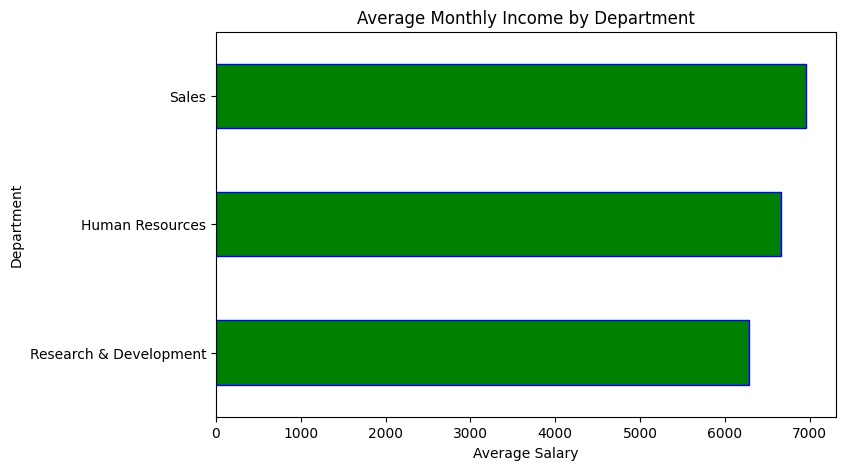

In [15]:
# 5. Average Monthly Income by Department
# ------------------------------
avg_salary = df.groupby("Department")["MonthlyIncome"].mean().sort_values()
avg_salary.plot(kind="barh", color="green", edgecolor="blue", figsize=(8,5))
plt.title("Average Monthly Income by Department")
plt.xlabel("Average Salary")
plt.ylabel("Department")
plt.show()


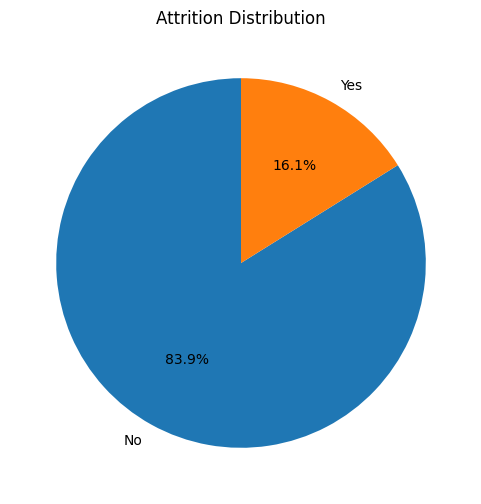

In [16]:
# 6. Attrition Count (Yes/No)
# ------------------------------
attr_count = df["Attrition"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(attr_count, labels=attr_count.index, autopct="%1.1f%%", startangle=90)
plt.title("Attrition Distribution")
plt.show()

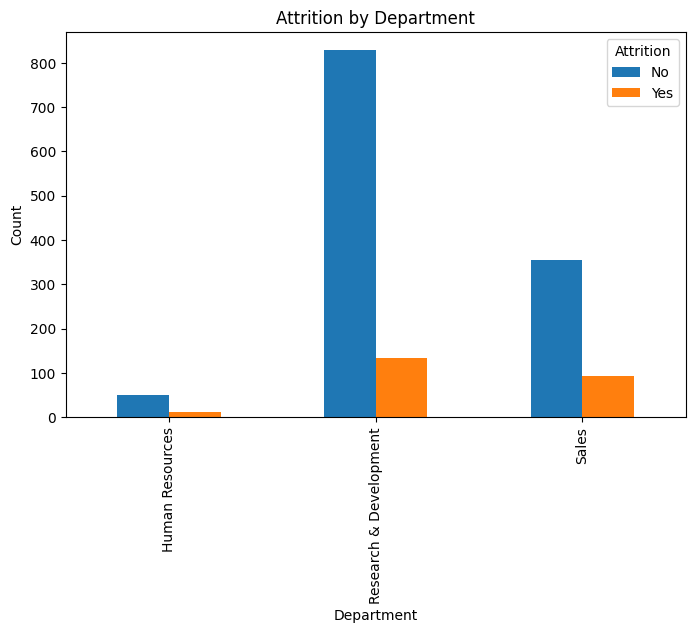

In [17]:
# 7. Attrition by Department
# ------------------------------
attr_by_dept = df.groupby("Department")["Attrition"].value_counts().unstack()
attr_by_dept.plot(kind="bar", figsize=(8,5))
plt.title("Attrition by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

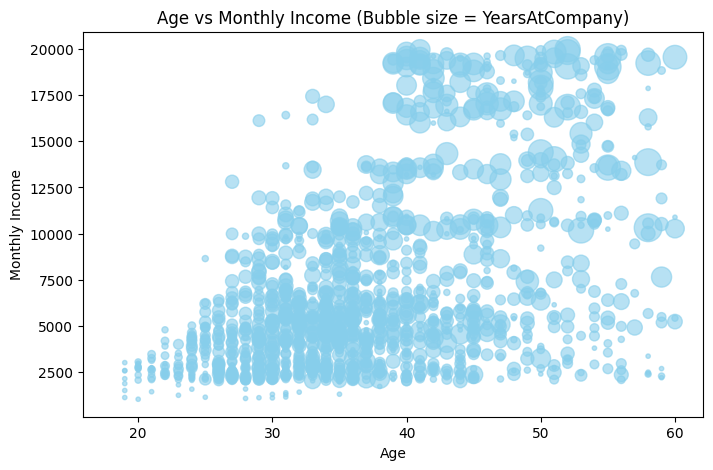

In [18]:
# 8. Age vs Monthly Income (Bubble Size = YearsAtCompany)
# ------------------------------
plt.figure(figsize=(8,5))
plt.scatter(df['Age'], df['MonthlyIncome'], 
            s=df['YearsAtCompany']*10, alpha=0.6, c='skyblue')
plt.title("Age vs Monthly Income (Bubble size = YearsAtCompany)")
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.show()

In [19]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, min, max

# ------------------------------
# 1. Start Spark session
# ------------------------------
spark = SparkSession.builder.appName("HR_Attrition_Analytics").getOrCreate()

In [21]:
# 2. Load dataset
# ------------------------------
df = spark.read.option("header", True).option("inferSchema", True).csv("HR-Employee-Attrition.csv")


In [22]:
# Schema
df.printSchema()


root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- Over18: string (nullable = true)
 |-- OverTime: string 

In [23]:
# 3. Total number of employees
# ------------------------------
print("Total number of employees:", df.count())

Total number of employees: 1470


In [24]:
# 4. Total number of departments
print("Total number of departments:", df.select("Department").distinct().count())

Total number of departments: 3


In [25]:
# 5. Department names
# ------------------------------
print("Department names:")
df.select("Department").distinct().show()

Department names:
+--------------------+
|          Department|
+--------------------+
|               Sales|
|Research & Develo...|
|     Human Resources|
+--------------------+



In [26]:
# 6. Employees per department
# ------------------------------
print("Employees per department:")
df.groupBy("Department").count().show()

Employees per department:
+--------------------+-----+
|          Department|count|
+--------------------+-----+
|               Sales|  446|
|Research & Develo...|  961|
|     Human Resources|   63|
+--------------------+-----+



In [27]:
# 7. Employees per job role
# ------------------------------
print("Employees per JobRole:")
df.groupBy("JobRole").count().show()

Employees per JobRole:
+--------------------+-----+
|             JobRole|count|
+--------------------+-----+
|     Sales Executive|  326|
|Manufacturing Dir...|  145|
|Laboratory Techni...|  259|
|Sales Representative|   83|
|Healthcare Repres...|  131|
|  Research Scientist|  292|
|             Manager|  102|
|   Research Director|   80|
|     Human Resources|   52|
+--------------------+-----+



In [28]:
# 8. Average MonthlyIncome by department
# ------------------------------
print("Average MonthlyIncome by Department:")
df.groupBy("Department").agg(avg("MonthlyIncome").alias("avg_income")).show()

Average MonthlyIncome by Department:
+--------------------+-----------------+
|          Department|       avg_income|
+--------------------+-----------------+
|               Sales| 6959.17264573991|
|Research & Develo...|6281.252861602497|
|     Human Resources|6654.507936507936|
+--------------------+-----------------+



In [29]:
# 9. Min and Max MonthlyIncome by department
# ------------------------------
print("Min/Max MonthlyIncome by Department:")
df.groupBy("Department").agg(min("MonthlyIncome").alias("min_income"),
                             max("MonthlyIncome").alias("max_income")).show()


Min/Max MonthlyIncome by Department:
+--------------------+----------+----------+
|          Department|min_income|max_income|
+--------------------+----------+----------+
|               Sales|      1052|     19847|
|Research & Develo...|      1009|     19999|
|     Human Resources|      1555|     19717|
+--------------------+----------+----------+



In [30]:
# 10. Attrition distribution
# ------------------------------
print("Attrition distribution:")
df.groupBy("Attrition").count().show()

Attrition distribution:
+---------+-----+
|Attrition|count|
+---------+-----+
|       No| 1233|
|      Yes|  237|
+---------+-----+



In [31]:
# 11. Attrition by Department
# ------------------------------
print("Attrition by Department:")
df.groupBy("Department", "Attrition").count().show()

Attrition by Department:
+--------------------+---------+-----+
|          Department|Attrition|count|
+--------------------+---------+-----+
|Research & Develo...|       No|  828|
|     Human Resources|       No|   51|
|               Sales|      Yes|   92|
|               Sales|       No|  354|
|Research & Develo...|      Yes|  133|
|     Human Resources|      Yes|   12|
+--------------------+---------+-----+



In [47]:
# 12. Employees older than 45 (save to CSV)
import os
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# ------------------------------
# 1. Start Spark session
# ------------------------------
spark = SparkSession.builder \
    .appName("HR_Attrition_Analytics") \
    .getOrCreate()

# ------------------------------
# 2. Load dataset
# ------------------------------
csv_file = r"C:\spark\spark-3.5.6-bin-hadoop3\bin\HR Data Processing System\HR-Employee-Attrition.csv"

if not os.path.exists(csv_file):
    raise FileNotFoundError(f"CSV file not found at: {csv_file}")

df = spark.read.option("header", True).option("inferSchema", True).csv(csv_file)

# ------------------------------
# 3. Filter employees older than 45
# ------------------------------
older_45 = df.filter(col("Age") > 45)

# ------------------------------
# 4. Save directly using Pandas in the same folder
# ------------------------------
output_folder = r"C:\spark\spark-3.5.6-bin-hadoop3\bin\HR Data Processing System"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

final_file = os.path.join(output_folder, "Employees_Age_45.csv")

# Convert to Pandas and save
older_45.toPandas().to_csv(final_file, index=False)

print(f"✅ Saved employees older than 45 into: {final_file}")


✅ Saved employees older than 45 into: C:\spark\spark-3.5.6-bin-hadoop3\bin\HR Data Processing System\Employees_Age_45.csv


In [33]:
print("Top 10 highest paid employees:")
df.select("EmployeeNumber", "JobRole", "MonthlyIncome", "Department") \
  .orderBy(col("MonthlyIncome").desc()) \
  .show(10)


Top 10 highest paid employees:
+--------------+-----------------+-------------+--------------------+
|EmployeeNumber|          JobRole|MonthlyIncome|          Department|
+--------------+-----------------+-------------+--------------------+
|           259|          Manager|        19999|Research & Develo...|
|          1035|Research Director|        19973|Research & Develo...|
|          1191|          Manager|        19943|Research & Develo...|
|           226|          Manager|        19926|Research & Develo...|
|           787|          Manager|        19859|Research & Develo...|
|          1282|          Manager|        19847|               Sales|
|          1038|          Manager|        19845|               Sales|
|          1740|          Manager|        19833|               Sales|
|          1255|Research Director|        19740|Research & Develo...|
|          1338|          Manager|        19717|     Human Resources|
+--------------+-----------------+-------------+-----------

In [34]:
print("Top 10 lowest paid employees:")
df.select("EmployeeNumber", "JobRole", "MonthlyIncome", "Department") \
  .orderBy(col("MonthlyIncome").asc()) \
  .show(10)


Top 10 lowest paid employees:
+--------------+--------------------+-------------+--------------------+
|EmployeeNumber|             JobRole|MonthlyIncome|          Department|
+--------------+--------------------+-------------+--------------------+
|           701|  Research Scientist|         1009|Research & Develo...|
|          1012|  Research Scientist|         1051|Research & Develo...|
|          1056|Sales Representative|         1052|               Sales|
|          1876|Sales Representative|         1081|               Sales|
|          1928|Sales Representative|         1091|               Sales|
|           243|Laboratory Techni...|         1102|Research & Develo...|
|          1273|Sales Representative|         1118|               Sales|
|          1974|Laboratory Techni...|         1129|Research & Develo...|
|           411|Sales Representative|         1200|               Sales|
|          1270|  Research Scientist|         1223|Research & Develo...|
+--------------+-----

In [35]:
print("Average age by Department:")
df.groupBy("Department").agg(avg("Age").alias("avg_age")).show()


Average age by Department:
+--------------------+-----------------+
|          Department|          avg_age|
+--------------------+-----------------+
|               Sales|36.54260089686099|
|Research & Develo...| 37.0426638917794|
|     Human Resources|37.80952380952381|
+--------------------+-----------------+



In [36]:
# 12. Employees older than 45 (save to CSV)
# ------------------------------
older_45 = df.filter(col("Age") > 45)

print("Employees older than 45:")
older_45.select("EmployeeNumber", "Age", "Department", "MonthlyIncome").show(50)

Employees older than 45:
+--------------+---+--------------------+-------------+
|EmployeeNumber|Age|          Department|MonthlyIncome|
+--------------+---+--------------------+-------------+
|             2| 49|Research & Develo...|         5130|
|            10| 59|Research & Develo...|         2670|
|            23| 53|               Sales|        15427|
|            32| 53|Research & Develo...|        19094|
|            38| 46|               Sales|        18947|
|            47| 50|               Sales|         2683|
|            62| 46|               Sales|         5772|
|            64| 48|Research & Develo...|         5381|
|            80| 50|Research & Develo...|        18740|
|            81| 59|               Sales|         7637|
|            84| 55|Research & Develo...|        14756|
|            91| 59|               Sales|         5473|
|           103| 46|     Human Resources|         5021|
|           106| 55|               Sales|        10239|
|           112| 56|Res

In [37]:
total_emp = df.count()
attrition_rate = df.filter(col("Attrition") == "Yes").count() / total_emp * 100
print(f"Attrition Rate: {attrition_rate:.2f}%")


Attrition Rate: 16.12%


In [38]:
print("Attrition by JobRole:")
df.groupBy("JobRole", "Attrition").count().show()


Attrition by JobRole:
+--------------------+---------+-----+
|             JobRole|Attrition|count|
+--------------------+---------+-----+
|  Research Scientist|       No|  245|
|Manufacturing Dir...|      Yes|   10|
|             Manager|       No|   97|
|Manufacturing Dir...|       No|  135|
|Laboratory Techni...|       No|  197|
|Healthcare Repres...|      Yes|    9|
|   Research Director|      Yes|    2|
|     Sales Executive|      Yes|   57|
|     Human Resources|       No|   40|
|     Sales Executive|       No|  269|
|   Research Director|       No|   78|
|  Research Scientist|      Yes|   47|
|             Manager|      Yes|    5|
|Laboratory Techni...|      Yes|   62|
|Healthcare Repres...|       No|  122|
|Sales Representative|      Yes|   33|
|     Human Resources|      Yes|   12|
|Sales Representative|       No|   50|
+--------------------+---------+-----+



In [39]:
print("High Overtime & Low Salary employees:")
df.filter((col("OverTime") == "Yes") & (col("MonthlyIncome") < 3000)) \
  .select("EmployeeNumber", "JobRole", "MonthlyIncome", "OverTime") \
  .show(10)


High Overtime & Low Salary employees:
+--------------+--------------------+-------------+--------+
|EmployeeNumber|             JobRole|MonthlyIncome|OverTime|
+--------------+--------------------+-------------+--------+
|             4|Laboratory Techni...|         2090|     Yes|
|             5|  Research Scientist|         2909|     Yes|
|            10|Laboratory Techni...|         2670|     Yes|
|            19|Laboratory Techni...|         2028|     Yes|
|            22|Laboratory Techni...|         2935|     Yes|
|            45|  Research Scientist|         2293|     Yes|
|            47|Sales Representative|         2683|     Yes|
|           133|     Human Resources|         2073|     Yes|
|           137|Laboratory Techni...|         2926|     Yes|
|           167|Sales Representative|         1675|     Yes|
+--------------+--------------------+-------------+--------+
only showing top 10 rows



In [40]:
print("Average MonthlyIncome by Education Field:")
df.groupBy("EducationField").agg(avg("MonthlyIncome").alias("avg_income")).show()


Average MonthlyIncome by Education Field:
+----------------+-----------------+
|  EducationField|       avg_income|
+----------------+-----------------+
|Technical Degree| 5758.30303030303|
|           Other|6071.548780487805|
|       Marketing|7348.584905660377|
|         Medical|6510.036637931034|
|   Life Sciences|6463.288778877888|
| Human Resources|7241.148148148148|
+----------------+-----------------+



In [41]:
print("Attrition grouped by YearsAtCompany:")
df.groupBy("YearsAtCompany", "Attrition").count().orderBy("YearsAtCompany").show()


Attrition grouped by YearsAtCompany:
+--------------+---------+-----+
|YearsAtCompany|Attrition|count|
+--------------+---------+-----+
|             0|       No|   28|
|             0|      Yes|   16|
|             1|       No|  112|
|             1|      Yes|   59|
|             2|       No|  100|
|             2|      Yes|   27|
|             3|      Yes|   20|
|             3|       No|  108|
|             4|       No|   91|
|             4|      Yes|   19|
|             5|       No|  175|
|             5|      Yes|   21|
|             6|       No|   67|
|             6|      Yes|    9|
|             7|      Yes|   11|
|             7|       No|   79|
|             8|       No|   71|
|             8|      Yes|    9|
|             9|      Yes|    8|
|             9|       No|   74|
+--------------+---------+-----+
only showing top 20 rows



In [42]:
print("Potential promotion candidates:")
df.filter((col("Age") > 40) & (col("YearsAtCompany") > 10)) \
  .select("EmployeeNumber", "Age", "YearsAtCompany", "JobRole", "Department") \
  .show(10)


Potential promotion candidates:
+--------------+---+--------------+--------------------+--------------------+
|EmployeeNumber|Age|YearsAtCompany|             JobRole|          Department|
+--------------+---+--------------+--------------------+--------------------+
|            23| 53|            25|             Manager|               Sales|
|            32| 53|            14|             Manager|Research & Develo...|
|            36| 44|            22|Healthcare Repres...|Research & Develo...|
|            58| 41|            22|   Research Director|Research & Develo...|
|            80| 50|            27|   Research Director|Research & Develo...|
|            81| 59|            21|     Sales Executive|               Sales|
|           131| 58|            37|     Sales Executive|               Sales|
|           145| 51|            13|Healthcare Repres...|Research & Develo...|
|           158| 43|            25|             Manager|               Sales|
|           162| 51|            

In [44]:
from pyspark.sql.functions import count, when, round

# Total employees per department
dept_counts = df.groupBy("Department").agg(count("*").alias("total_employees"))

# Employees who left (Attrition = Yes)
dept_attrition = df.groupBy("Department").agg(
    count(when(col("Attrition") == "Yes", True)).alias("attrition_yes")
)

# Join both
attrition_rate_by_dept = dept_counts.join(dept_attrition, "Department")

# Calculate percentage
attrition_rate_by_dept = attrition_rate_by_dept.withColumn(
    "attrition_rate_percent",
    round((col("attrition_yes") / col("total_employees")) * 100, 2)
)

print("Attrition rate by Department:")
attrition_rate_by_dept.show()


Attrition rate by Department:
+--------------------+---------------+-------------+----------------------+
|          Department|total_employees|attrition_yes|attrition_rate_percent|
+--------------------+---------------+-------------+----------------------+
|               Sales|            446|           92|                 20.63|
|Research & Develo...|            961|          133|                 13.84|
|     Human Resources|             63|           12|                 19.05|
+--------------------+---------------+-------------+----------------------+



In [45]:
df_updated = df.withColumn("UpdatedSalary", 
                            col("MonthlyIncome") + 
                            (col("MonthlyIncome") * 0.10 * (col("YearsAtCompany") > 5).cast("int")))

print("Updated salaries (10% raise for >5 years at company):")
df_updated.select("EmployeeNumber", "YearsAtCompany", "MonthlyIncome", "UpdatedSalary").show(10)


Updated salaries (10% raise for >5 years at company):
+--------------+--------------+-------------+-------------+
|EmployeeNumber|YearsAtCompany|MonthlyIncome|UpdatedSalary|
+--------------+--------------+-------------+-------------+
|             1|             6|         5993|       6592.3|
|             2|            10|         5130|       5643.0|
|             4|             0|         2090|       2090.0|
|             5|             8|         2909|       3199.9|
|             7|             2|         3468|       3468.0|
|             8|             7|         3068|       3374.8|
|            10|             1|         2670|       2670.0|
|            11|             1|         2693|       2693.0|
|            12|             9|         9526|      10478.6|
|            13|             7|         5237|       5760.7|
+--------------+--------------+-------------+-------------+
only showing top 10 rows



In [46]:
import os
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create Spark session
spark = SparkSession.builder \
    .appName("HRDataProcessing") \
    .getOrCreate()

# Input CSV path
input_path = r"C:\spark\spark-3.5.6-bin-hadoop3\bin\HR Data Processing System\HR-Employee-Attrition.csv"

# Load CSV with Spark
df = spark.read.csv(input_path, header=True, inferSchema=True)

# Filter employees who left (replace 'Attrition' if different)
left_emp_df = df.filter(col("Attrition") == "Yes")

# Output CSV path
final_file = r"C:\spark\spark-3.5.6-bin-hadoop3\bin\HR Data Processing System\Employees_Left.csv"

# Use Pandas to save directly (avoiding Spark Windows issues)
left_emp_df.toPandas().to_csv(final_file, index=False)

print(f"✅ Saved employees who left into: {final_file}")


✅ Saved employees who left into: C:\spark\spark-3.5.6-bin-hadoop3\bin\HR Data Processing System\Employees_Left.csv


# Conclusion

The dataset provides a comprehensive view of a mid-sized organization with a strong focus on Research & Development and Sales functions. The workforce is predominantly mid-career, with employees averaging 37 years of age and showing a healthy mix of experience levels. Compensation practices, including salaries and salary hikes, demonstrate structured growth aligned with job levels and tenure, though significant variation exists due to executive-level outliers.

Employee satisfaction indicators such as job satisfaction, work-life balance, and relationship satisfaction are generally positive, yet attrition remains a concern, particularly among younger employees, sales roles, and those working overtime. Training opportunities and promotion patterns highlight areas where career development strategies could further strengthen retention.

Overall, the dataset is highly suitable for HR analytics, workforce planning, and attrition prediction models. Insights derived from this data can guide management in improving retention strategies, refining promotion policies, and ensuring long-term organizational stability.